In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dfx=pd.read_csv("./Training Data/Train.csv")

In [4]:
data=dfx.values
x=data[:][:,:5]
y=data[:][:,5]
print(x.shape)
print(y.shape)
print(y)

(1600, 5)
(1600,)
[ -82.15466656  -48.89796018   77.2703707  ... -107.51050797  -47.34155781
 -115.93900296]


In [77]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x[0]+theta[2]*x[1] + theta[3]*x[2] + theta[4]*x[3] + theta[5]*x[4]
           

def error(X,Y,theta):
    
    m = X.shape[0]
    error = 0
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        error += (hx-Y[i])**2
        
    return error

def gradient(X,Y,theta):
    
    grad = np.zeros((6,))
    m = X.shape[0]

    for i in range(m):
        hx = hypothesis(X[i],theta)
        grad[0] +=  (hx-Y[i])
        grad[1] += (hx-Y[i])*X[i][0]
        grad[2] += (hx-Y[i])*X[i][1]
        grad[3] += (hx-Y[i])*X[i][2]
        grad[4] += (hx-Y[i])*X[i][3]
        grad[5] += (hx-Y[i])*X[i][4]
        
    return grad
    
#Algorithm
def gradientDescent(X,Y,learning_rate=0.001):
    
    theta = np.array([-2.0,0.0,0.0,0.0,0.0,0.0])
    
    itr = 0
    max_itr = 100
    
    error_list = []
    theta_list = []
    
    while(itr<=max_itr):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        theta[2] = theta[2] - learning_rate*grad[2]
        theta[3] = theta[3] - learning_rate*grad[3]
        theta[4] = theta[4] - learning_rate*grad[4]
        theta[5] = theta[5] - learning_rate*grad[5]
        
        itr += 1
        
    
    return theta,error_list,theta_list

In [78]:
final_theta, error_list,theta_list = gradientDescent(x,y)

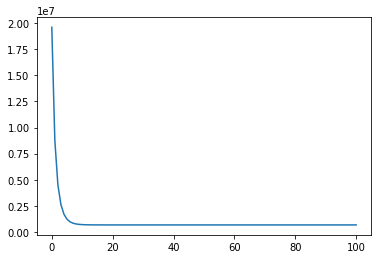

In [79]:
plt.plot(error_list)
plt.show()

In [80]:
print(final_theta)

[ 4.99096674 29.68187118 92.6624776   8.28062089 44.76773522  2.51916121]


In [90]:
test_data=pd.read_csv("./Testing Data/Test.csv")
test_data=test_data.values
#output=[]
#for i in test_data :
#    output.append(hypothesis(test_data,final_theta))
#print(output)
print(test_data.shape)
output=np.zeros(test_data.shape[0])
j=0
for i in test_data :
    output[j]=hypothesis(i,final_theta)
    j+=1
print(output.shape)

(400, 5)
(400,)


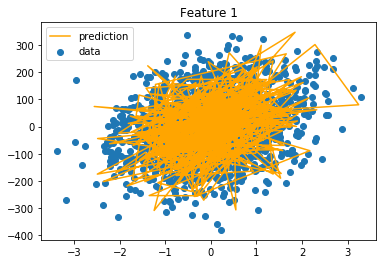

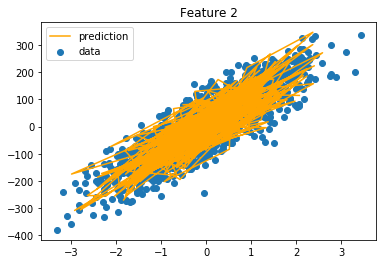

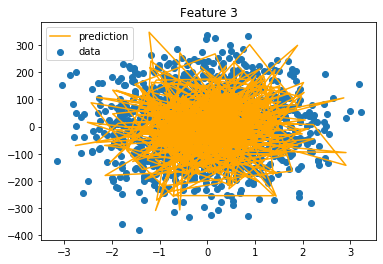

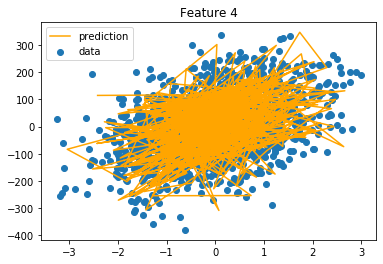

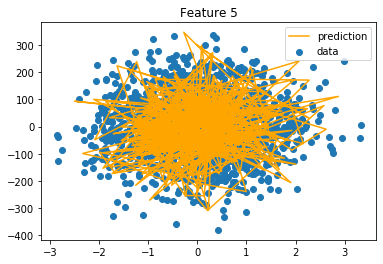

In [91]:
plt.scatter(x[:,0],y,label='data')
plt.plot(test_data[:,0],output,color='orange',label='prediction')
plt.legend()
plt.title("Feature 1")
plt.show()
plt.scatter(x[:,1],y,label='data')
plt.plot(test_data[:,1],output,color='orange',label='prediction')
plt.legend()
plt.title("Feature 2")
plt.show()
plt.scatter(x[:,2],y,label='data')
plt.plot(test_data[:,2],output,color='orange',label='prediction')
plt.legend()
plt.title("Feature 3")
plt.show()
plt.scatter(x[:,3],y,label='data')
plt.plot(test_data[:,3],output,color='orange',label='prediction')
plt.legend()
plt.title("Feature 4")
plt.show()
plt.scatter(x[:,4],y,label='data')
plt.plot(test_data[:,4],output,color='orange',label='prediction')
plt.legend()
plt.title("Feature 5")
plt.show()

In [48]:
print(test_data)

[[ 1.01525387e+00  2.07620944e+00 -2.66434820e-01 -2.41808820e+00
  -9.80502790e-01]
 [-3.75021204e-01  9.53184528e-01  6.26719138e-01  7.04405750e-01
  -3.55489211e-01]
 [-1.02445225e+00  9.62991107e-01 -4.07942004e-01 -1.86127383e+00
   4.55201351e-01]
 ...
 [ 5.54727647e-01  1.76824345e+00 -8.97787210e-01 -1.19366107e+00
   3.40563374e-01]
 [-1.62717246e+00  8.56470994e-01 -5.65729519e-04  6.29386649e-01
   4.53382144e-01]
 [ 1.39310499e-01  5.31597186e-01 -8.53107053e-01  3.16920076e-02
   1.71489304e+00]]


In [51]:
print(output[:,])

[-120.54148421  185.20485805   82.11563804  -45.47824257 -111.08326799]
